# HM4, Clustering and PCA

## Load Data Set

In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

# 1. load 
data = datasets.load_iris()
X,y= data.data, data.target


### k-Means

In [2]:
from sklearn import datasets, metrics, cluster, mixture

# parameterize clustering
kmeans_algo = cluster.KMeans(n_clusters=3,algorithm='lloyd',init='random',n_init=1)

# learn the model
kmeans_model = kmeans_algo.fit(X)

# return centroids
kmeans_model.cluster_centers_
labels = kmeans_model.labels_

In [3]:
print("means:\n",kmeans_model.cluster_centers_)

means:
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


### Evaluation

In [4]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X, labels, metric='euclidean'))

Silhouette: 0.5528190123564095


If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.



In [5]:
from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin:",davies_bouldin_score(X, labels))

Davies Bouldin: 0.6619715465007455


## EM Clustering

In [6]:
from sklearn.mixture import GaussianMixture

# learn EM with multivariate Gaussian assumption
em_algo = GaussianMixture(n_components=3, covariance_type='full',n_init=1) 
em_model = em_algo.fit(X)

# describe EM solution
print("means:\n",em_model.means_,"\n\ncovariances:\n",em_model.covariances_)

means:
 [[5.91697517 2.77803998 4.20523542 1.29841561]
 [5.006      3.428      1.462      0.246     ]
 [6.54632887 2.94943079 5.4834877  1.98716063]] 

covariances:
 [[[0.27550587 0.09663458 0.18542939 0.05476915]
  [0.09663458 0.09255531 0.09103836 0.04299877]
  [0.18542939 0.09103836 0.20227635 0.0616792 ]
  [0.05476915 0.04299877 0.0616792  0.03232217]]

 [[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.38741443 0.09223101 0.30244612 0.06089936]
  [0.09223101 0.11040631 0.08386768 0.0557538 ]
  [0.30244612 0.08386768 0.32595958 0.07283247]
  [0.06089936 0.0557538  0.07283247 0.08488025]]]


In [7]:
prob=em_model.predict_proba(X)
prob[5]

array([8.48608974e-45, 1.00000000e+00, 3.36012794e-35])

## Evaluation

In [8]:
labels_em= em_model.predict(X)
print("Silhouette:",metrics.silhouette_score(X, labels_em, metric='euclidean'))
print("Davies Bouldin:",davies_bouldin_score(X, labels_em))

Silhouette: 0.5011761635067206
Davies Bouldin: 0.7483456326730998


## PCA

In [9]:
from sklearn.decomposition import PCA

# learn the transformation (components as linear combination of features)
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
print("Components:\n",pca.components_)


Components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


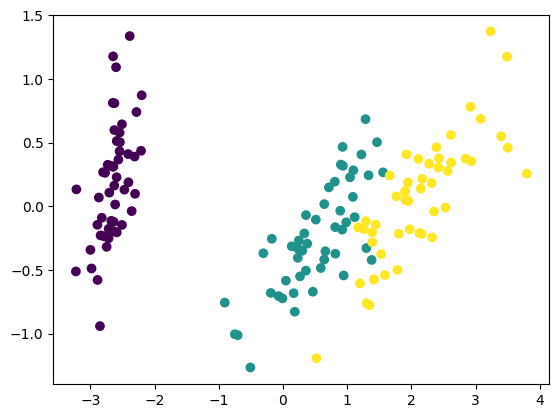

In [10]:
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
plt.show()

## k Means

In [11]:
X_pca = pca.transform(X)


# learn the model
kmeans_model = kmeans_algo.fit(X_pca)

# return centroids
kmeans_model.cluster_centers_
labels = kmeans_model.labels_


In [12]:
print("means:\n",kmeans_model.cluster_centers_)

means:
 [[-2.64241546  0.19088505]
 [ 2.34652659  0.27393856]
 [ 0.66567601 -0.3316042 ]]


In [13]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X_pca, labels, metric='euclidean'))

Silhouette: 0.597676421954799


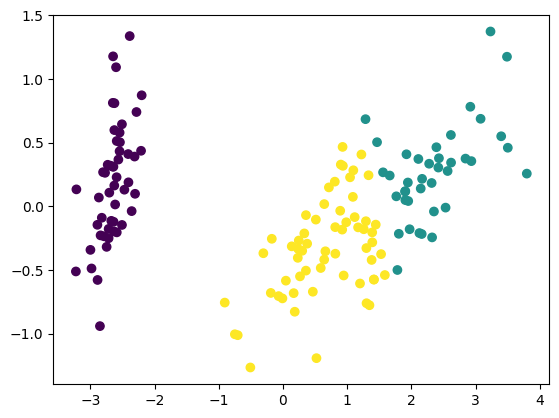

In [14]:

plt.scatter(X_pca[:,0], X_pca[:,1],c=labels)
plt.show()


## EM Clustering

Silhouette: 0.5313081506070261


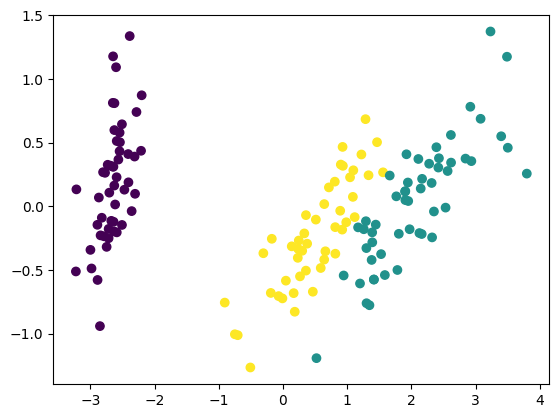

In [15]:
em_model = em_algo.fit(X_pca)
labels_em= em_model.predict(X_pca)
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X_pca, labels_em, metric='euclidean'))

plt.scatter(X_pca[:,0], X_pca[:,1],c=labels_em)
plt.show()